# Diseño Productor-Consumidor

El diseño de este experimento consiste en la implementación de un flujo con doble encolamiento, haciendo uso de la clase `asyncio.Queue`. 
Inicialmente se diseñó una función asíncrona, que se encarga de la descarga de imagenes, y subirlas hacia la cola en donde serán almacenadas para que el consumidor las lea.
La cantidad de imagenes que serán subidas en la cola depende del parámetro `maxsize` definido al instanciar la clase `Queue`.
Con esto se busca encontrar un balance entre velocidad y memoria usada para la carga y descarga de las imagenes. Se busca lograr con este patrón las siguientes características:

* Limita la cantidad de imagenes descargadas: Con el uso del encolamiento, se busca que el productor, en este caso el servicio de descarga de imagenes no sature el disco descargandolas todas desde el inicio, sino que solo vaya descargando las suficientes para mantener la cola llena, y cuando el consumidor vaya liberando un espacio de la cola, mientras procesa la imagen, el productor vaya descargando la otra imagen para manetener la cola llena, de tal manera que no se generen pérdidas de tiempo por I/O Bound

* Dejar una cantidad fija de imagenes listas para el consumidor: Con esto se busca que el consumidor no tenga que ir hasta el disco y leer la imagen, sino que se encuentre lista por el productor dentro del sistema de encolamiento.

Las pruebas de carga de este método se hicieron con el siguiente comando:
`/usr/bin/python ./asyncloader_queue.py --inputs ./data/pokemon-gen1-data.csv --output_dir .downloads/`

## Ventajas de este diseño

El diseño con doble Queue tiene como objetivo aprovechar al máximo las ventajas de velocidad que ofrece la implementación de métodos asíncronos, pero optimizando a su vez el uso de disco duro. Está divido en dos colas, productor y consumidor, siguiendo este flujo:  

`Pokemons (URL) → Downloader → (producer_queue) → Reader → (consumer_queue) → Loader → (Delete Images)`  

De manera gráfica lo podemos visualizar así:  

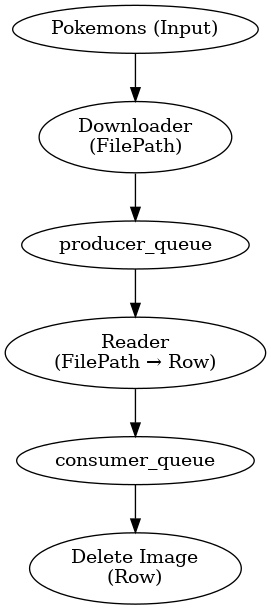

In [8]:
from graphviz import Digraph

def draw_pipeline():
    dot = Digraph(comment="Asyncio Queues Pipeline", format="png")


    dot.node("P", "Pokemons (Input)")
    dot.node("D", "Downloader\n(FilePath)")
    dot.node("Q1", "producer_queue")
    dot.node("R", "Reader\n(FilePath → Row)")
    dot.node("Q2", "consumer_queue")
    dot.node("L", "Loader\n(Row)")
    dot.node("L", "Delete Image\n(Row)")


    dot.edge("P", "D")
    dot.edge("D", "Q1")
    dot.edge("Q1", "R")
    dot.edge("R", "Q2")
    dot.edge("Q2", "L")

    return dot

if __name__ == "__main__":
    dot = draw_pipeline()
    dot.render("pipeline", format="png")  # genera pipeline.png
from graphviz import Digraph
from IPython.display import Image

dot = draw_pipeline()
dot.render("pipeline", format="png")
Image(filename="pipeline.png")



Con la siguiente ejecución podemos observar como se alterna la parte de Download, Load y Delete demostrando que funcionan las implementaciones programadas

In [9]:
!/usr/bin/python /home/carlos/Eafit/computer-vision-data-loader/src/multiqueue.py --inputs data/pokemon-gen1-data.csv --output .downloads

Elapsed is 0.0000
Carga de .downloads/water/squirtle.png  en 0.95 s
Deleting .downloads/water/krabby.png
Carga de .downloads/fire/charizard.png  en 0.40 s
Deleting .downloads/poison/nidoran-f.png
Carga de .downloads/fighting/primeape.png  en 0.40 s
Deleting .downloads/poison/nidoran-m.png
Carga de .downloads/fire/growlithe.png  en 0.40 s
Deleting .downloads/water/slowpoke.png
Carga de .downloads/electric/electrode.png  en 0.40 s
Deleting .downloads/grass/exeggcute.png
Carga de .downloads/water/wartortle.png  en 0.40 s
Deleting .downloads/fire/arcanine.png
Carga de .downloads/ground/cubone.png  en 0.40 s
Deleting .downloads/grass/exeggutor.png
Carga de .downloads/water/kingler.png  en 0.40 s
Deleting .downloads/poison/nidoqueen.png
Carga de .downloads/bug/metapod.png  en 0.40 s
Deleting .downloads/normal/meowth.png
Carga de .downloads/normal/persian.png  en 0.40 s
Deleting .downloads/fairy/clefable.png
Carga de .downloads/fire/vulpix.png  en 0.40 s
Deleting .downloads/water/poliwrath.pn